# Team RiverBorn Solution

## Getting Start

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import preprocessing
from sklearn.cluster import KMeans

### Load the Data 

In [2]:
train_data = pd.read_csv("customer_dataset.csv")
train_data.head()

C:\Users\Induwara\AppData\Local\Temp\ipykernel_10148\3915550238.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("customer_dataset.csv")


,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


## Data Preprocessing

### Set customer ID as Index

In [3]:
train_data.set_index('customer_id',inplace=True)
train_data.index.name = None

train_data.head()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
1,790,1.11,2.84
2,176875,15.74,33.83
3,6812,2.11,NaN
4,38542,7.82,10.73
5,48712,7.51,10.04


### Ensure that the data types of each column are appropriate.

In [4]:
train_data.dtypes

average_monthly_spend               object
average_monthly_visit_frequency     object
average_monthly_basket_size        float64
dtype: object

In [5]:
train_data['average_monthly_spend'] = pd.to_numeric(train_data['average_monthly_spend'], errors='coerce')
train_data['average_monthly_visit_frequency'] = pd.to_numeric(train_data['average_monthly_visit_frequency'], errors='coerce')

train_data.dtypes

average_monthly_spend              float64
average_monthly_visit_frequency    float64
average_monthly_basket_size        float64
dtype: object

### Dealing with missing values

In [6]:
train_data.isnull().sum()

average_monthly_spend              9387
average_monthly_visit_frequency    9333
average_monthly_basket_size        9286
dtype: int64

In [7]:
train_data.shape

(570000, 3)

### Replace missing values with mean

In [8]:
train_data['average_monthly_spend'].fillna(train_data['average_monthly_spend'].mean(), inplace=True)
train_data['average_monthly_visit_frequency'].fillna(train_data['average_monthly_visit_frequency'].mean(), inplace=True)
train_data['average_monthly_basket_size'].fillna(train_data['average_monthly_basket_size'].mean(), inplace=True)

In [9]:
train_data.isnull().sum()

average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64

### Dealing with Duplicate Values

In [10]:
train_data.drop_duplicates(inplace=True)

train_data.shape

(559849, 3)

## Exploratory Data Analysis (EDA)

### Visualize distribution and outliers

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_monthly_spend'>

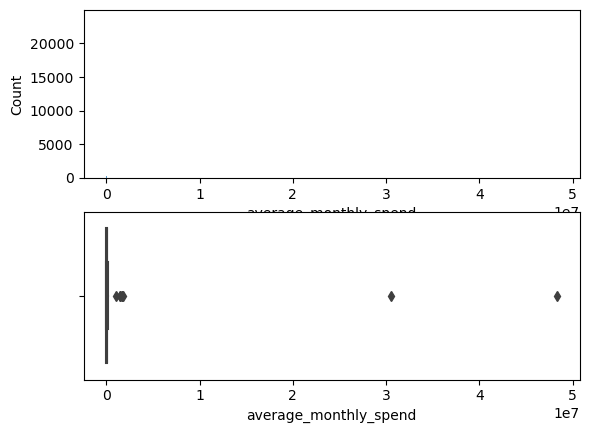

In [11]:
fig,(ax1,ax2) = plt.subplots(2,1)
sns.histplot(train_data['average_monthly_spend'],ax=ax1)
sns.boxplot(x=train_data['average_monthly_spend'],ax=ax2)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_monthly_visit_frequency'>

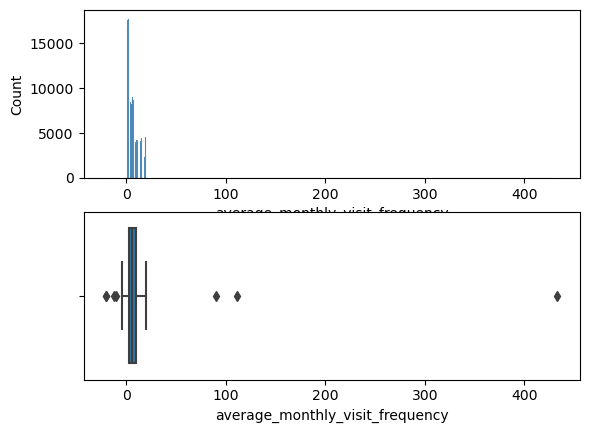

In [12]:
fig,(ax1,ax2) = plt.subplots(2,1)
sns.histplot(train_data['average_monthly_visit_frequency'],ax=ax1)
sns.boxplot(x=train_data['average_monthly_visit_frequency'],ax=ax2)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_monthly_basket_size'>

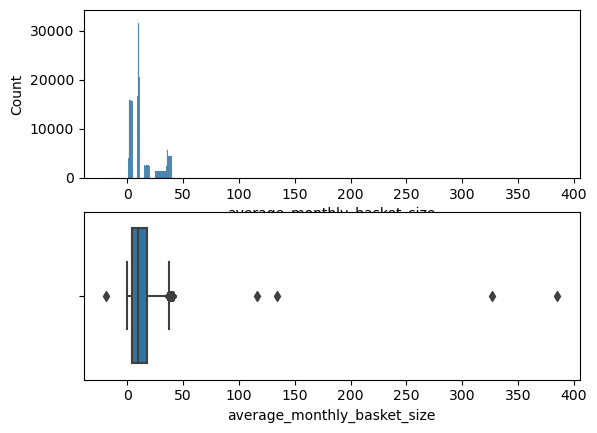

In [13]:
fig,(ax1,ax2) = plt.subplots(2,1)
sns.histplot(train_data['average_monthly_basket_size'],ax=ax1)
sns.boxplot(x=train_data['average_monthly_basket_size'],ax=ax2)

### Dealing with Outliers

In [14]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((train_data < lower_bound) | (train_data > upper_bound)).any(axis=1)

### Remove Outliers

In [15]:
train_cleaned = train_data[~outliers]

### Visualize cleaned data

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_monthly_spend'>

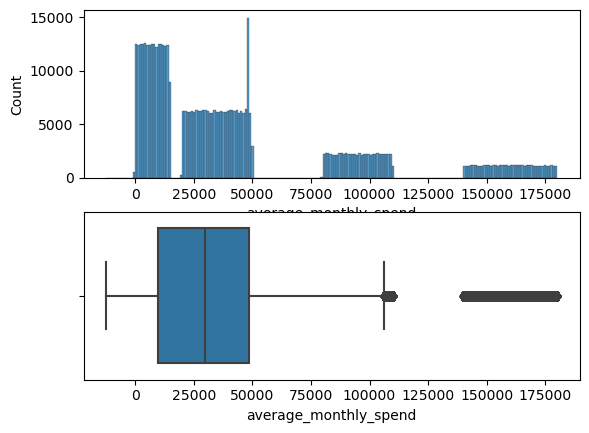

In [16]:
fig,(ax1,ax2) = plt.subplots(2,1)
sns.histplot(train_cleaned['average_monthly_spend'],ax=ax1)
sns.boxplot(x=train_cleaned['average_monthly_spend'],ax=ax2)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_monthly_visit_frequency'>

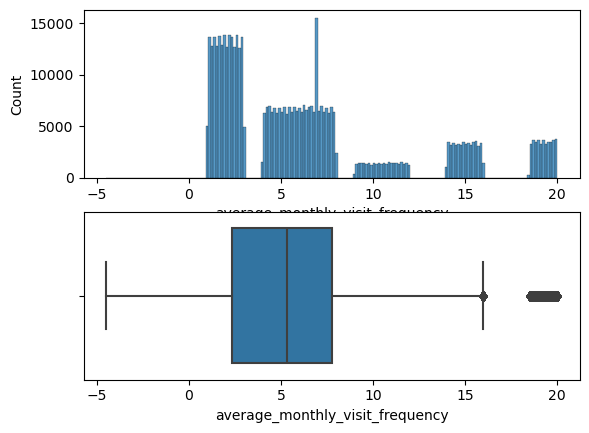

In [17]:
fig,(ax1,ax2) = plt.subplots(2,1)
sns.histplot(train_cleaned['average_monthly_visit_frequency'],ax=ax1)
sns.boxplot(x=train_cleaned['average_monthly_visit_frequency'],ax=ax2)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_monthly_basket_size'>

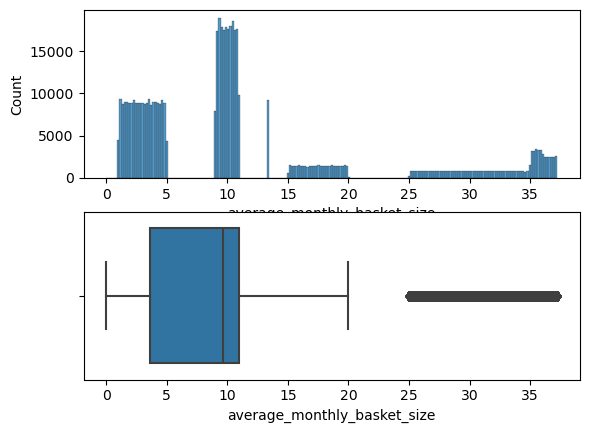

In [18]:
fig,(ax1,ax2) = plt.subplots(2,1)
sns.histplot(train_cleaned['average_monthly_basket_size'],ax=ax1)
sns.boxplot(x=train_cleaned['average_monthly_basket_size'],ax=ax2)

## Data Transformation and Clustering

### Standardize data

In [19]:
transform = preprocessing.StandardScaler()
train_scaled = transform.fit_transform(train_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])

train_scaled

array([[-0.93560826, -1.03294832, -0.85122026],
       [ 2.81200764,  1.71041821,  2.21403665],
       [-0.80744207, -0.84543181,  0.18296307],
       ...,
       [-0.64952226, -0.68416761, -0.65735438],
       [-0.70851872, -0.87168412, -0.82550335],
       [-0.86250117,  0.04874606, -0.94221853]])

### Clustering using KMeans

In [20]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=42,n_init=10)
kmeans.fit(train_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [21]:
train_cleaned['Cluster'] = kmeans.labels_
train_cleaned.head()

C:\Users\Induwara\AppData\Local\Temp\ipykernel_10148\4272999807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Cluster'] = kmeans.labels_


,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,Cluster
1,790.0,1.11,2.840000,3
2,176875.0,15.74,33.830000,1
3,6812.0,2.11,13.295679,0
4,38542.0,7.82,10.730000,0
5,48712.0,7.51,10.040000,0


### Visualize clusters

In [22]:
train_cleaned['Cluster'].value_counts()

Cluster
0    204676
3    196653
1     48431
2     40354
4     31626
Name: count, dtype: int64

## Cluster Analysis

### Visualize cluster characteristics

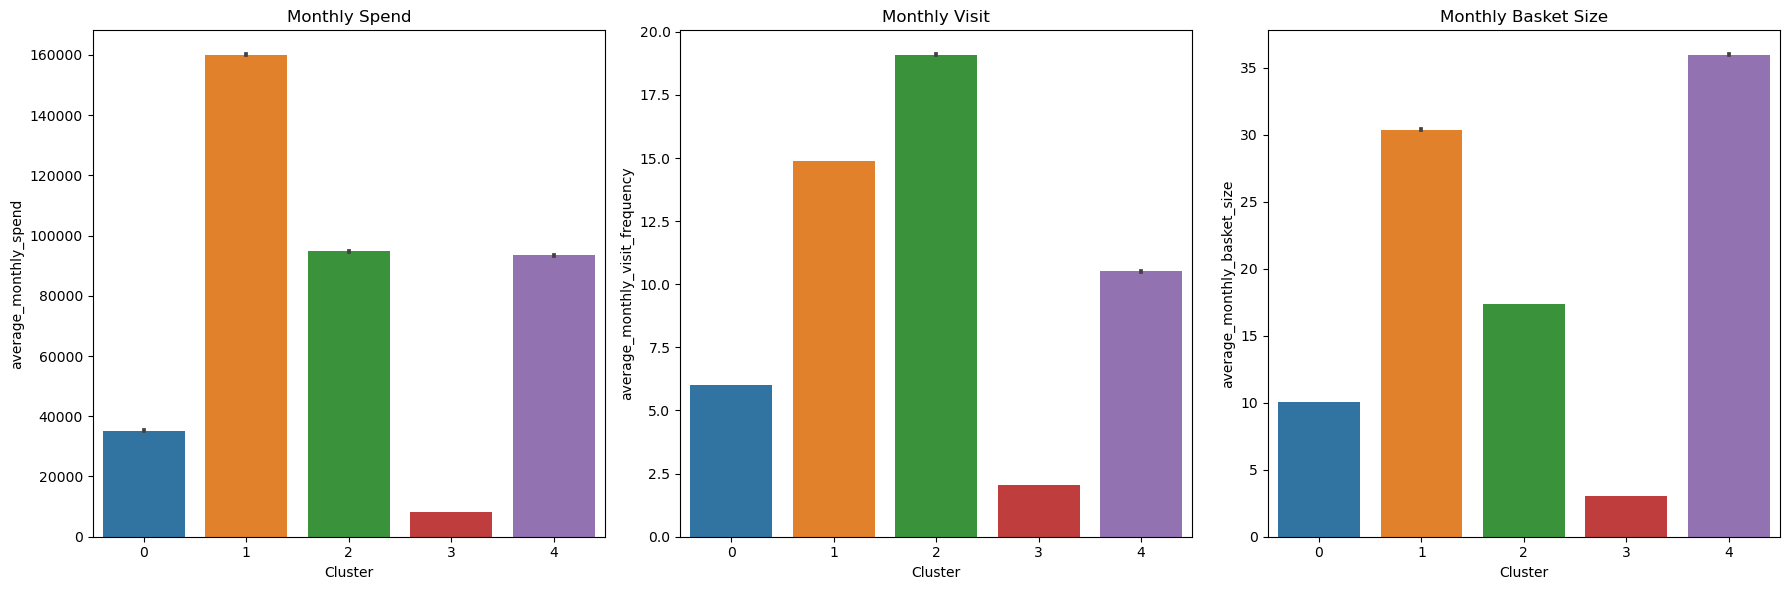

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=train_cleaned, x='Cluster', y='average_monthly_spend', ax=axs[0])
axs[0].set_title('Monthly Spend')

sns.barplot(data=train_cleaned, x='Cluster', y='average_monthly_visit_frequency', ax=axs[1])
axs[1].set_title('Monthly Visit')

sns.barplot(data=train_cleaned, x='Cluster', y='average_monthly_basket_size', ax=axs[2])
axs[2].set_title('Monthly Basket Size')

plt.tight_layout()
plt.show()

 |          |  monthly spend  |     monthly visit  |       monthly basket size   |        category
 | --- | --- | --- | --- | --- |
 |Cluster 0 | average         |   average          |     average                 |      Medium
 |Cluster 1 | very high       |    high            |      high                   |       Premium
 |Cluster 2 | high            |    very high       |      average                |       Frequent
 |Cluster 3 | low             |    low             |      low                    |       Low
 |Cluster 4 | high            |    average         |      very high              |       Loyal

### Assigning Categories to Clusters

In [24]:
clust_dict = {0:'Medium',1:'Premium',2:'Frequent',3:'Low',4:'Loyal'}

train_cleaned.loc[:,'Cluster'] = train_cleaned['Cluster'].map(clust_dict)

train_cleaned['Cluster'].value_counts()

Cluster
Medium      204676
Low         196653
Premium      48431
Frequent     40354
Loyal        31626
Name: count, dtype: int64

## Intervention Strategies

### Rules

In [25]:
def generate_rules(cluster):
    cluster_data = train_cleaned[train_cleaned['Cluster'] == cluster]
    
    column_list = ['average_monthly_spend','average_monthly_visit_frequency','average_monthly_basket_size']
    column_names = ['spend','visit frequency','basket size']

    print(cluster + " customers")
    for column, cname in zip(column_list, column_names):
        cluster_avg_value = cluster_data[column].mean()
        percentile_rank_cluster = stats.percentileofscore(train_cleaned[column], cluster_avg_value)
        
        
        lower_percentile_cluster = int(percentile_rank_cluster // 5) * 5
        upper_percentile_cluster = lower_percentile_cluster + 5
        
        print("Monthly {} between {} - {}th percentile.".format(cname, lower_percentile_cluster, upper_percentile_cluster))
    print(" ")


In [26]:
clusters = ['Premium','Frequent','Loyal']
for cluster in clusters:
    generate_rules(cluster)

Premium customers
Monthly spend between 95 - 100th percentile.
Monthly visit frequency between 85 - 90th percentile.
Monthly basket size between 85 - 90th percentile.
 
Frequent customers
Monthly spend between 80 - 85th percentile.
Monthly visit frequency between 95 - 100th percentile.
Monthly basket size between 80 - 85th percentile.
 
Loyal customers
Monthly spend between 80 - 85th percentile.
Monthly visit frequency between 80 - 85th percentile.
Monthly basket size between 95 - 100th percentile.
 


### Customer Segment: Premium
- **Assumptions:** Premium customers spend a lot each month, so they probably earn a good income and aren't too worried about higher prices. They come to the store often and buy a lot each time.
- **Promotion Goals:** We want to make these customers even more loyal to our brand by showing them why our expensive, high-quality products are worth it.
- **Customer preferences:** Premium customers like feeling special and getting things that are unique or personalized. They want the best quality.

- **Strategy:** Offer exclusive deals on our top-tier products, like limited edition items or personalized services. Focus on making them feel valued and appreciated for choosing our brand.

### Customer Segment: Frequent
- **Assumptions:** These customers come to the store a lot, so they probably live nearby and find it easy to get here. They don't spend as much as premium customers, but they still buy quite a bit.
- **Promotion Goals:** We want to encourage these customers to spend more money when they come in, even if it's just a little extra each time.
- **Customer preferences:** Since they're here often, they probably like buying everyday things they need regularly.

- **Strategy:** Give them special deals or rewards for spending a bit more each visit, like discounts on larger quantities or bundled items. Make it convenient for them to get what they need quickly and easily.

### Customer Segment: Loyal
- **Assumptions:** Loyal customers don't come in as often as the others, but when they do, they buy a lot. They really like our brand and stick with us.
- **Promotion Goals:** We want these customers to come in more often, so we need to give them extra reasons to visit us regularly.
- **Customer preferences:** They want good deals and lots of products for their money.

- **Strategy:** Offer them special discounts or promotions that change regularly, so they feel like they're getting a good deal every time they visit. Show them why it's worth coming back to us again and again.
